<a href="https://colab.research.google.com/github/KaziShadmanSakib/Artificial-Intelligence/blob/main/97_KaziShadmanSakib_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1121]:
# import library functions

In [1122]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

**Load Train Data and Test Data**

**Display Train Data using head() method**




In [1123]:
# name of the files in the folder
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Titanic'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# train data fetched
train_data = pd.read_csv("/content/drive/MyDrive/Titanic/train.csv")

# test data fetched
test_data = pd.read_csv("/content/drive/MyDrive/Titanic/test.csv")

# checking the train_data columns
train_data.head()

/content/drive/MyDrive/Titanic/train.csv
/content/drive/MyDrive/Titanic/gender_submission.csv
/content/drive/MyDrive/Titanic/test.csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Display Test Data using head() method**

In [1124]:
# checking the test_data columns
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Data Preprocessing and Data Analysis**

---



**Data Analysis on null values of train data**

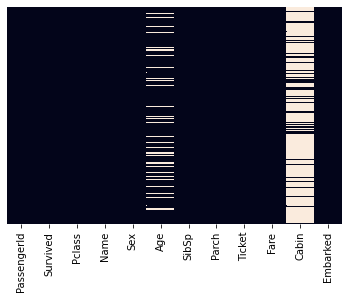

In [1125]:
# visualization of null values in all columns of train data
import seaborn as sns

sns.heatmap(train_data.isnull(), yticklabels = False, cbar = False)

**Data Analysis on null values of test data**

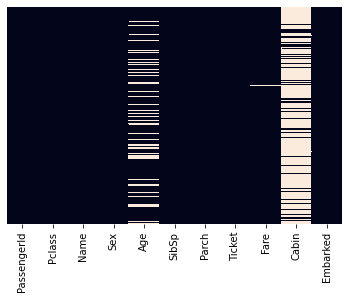

In [1126]:
# visualization of null values in all columns of test data
import seaborn as sns

sns.heatmap(test_data.isnull(), yticklabels = False, cbar = False)

**Data Preprocessing**

**Delete redundant columns named:**

1.   Ticket
2.   Name
3.   Cabin

**And checking for any null data in Train Data**



In [1127]:
# deleted redundant column named Ticket 
del train_data["Ticket"]
del test_data["Ticket"]
# print(train_data.sum())

# deleted redundant column named Name 
del train_data["Name"]
del test_data["Name"]
# print(train_data.sum())

# deleted redundant column named Cabin 
del train_data["Cabin"]
del test_data["Cabin"]
# print(train_data.sum())

# checking which column has null values
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

**Data Analysis**

---



**Visualizing the null values in all columns of train data**

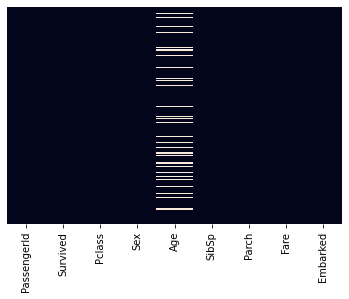

In [1128]:
# visualization of null values in all columns of train data
import seaborn as sns

sns.heatmap(train_data.isnull(), yticklabels = False, cbar = False)

**Visualizing Survived (1) and Not Survived (0) ratio using countplot**

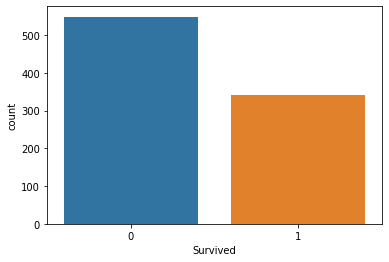

In [1129]:
# visualization of column Survived to check survived vs not survived ratio
sns.countplot(x = "Survived", data = train_data)

**Visualizing Survived column for checking survived vs not survived ratio depending on men and women (gender)**

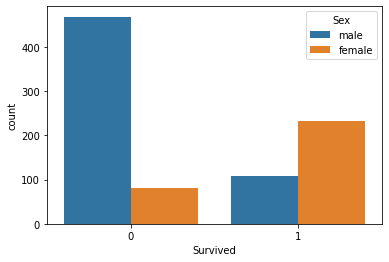

In [1130]:
# visualization of column Survived to check survived vs not survived ratio on men and women
sns.countplot(x = "Survived", hue="Sex" , data = train_data)

**Visualizing Survived column for checking survived vs not survived ratio depending on Pclass**

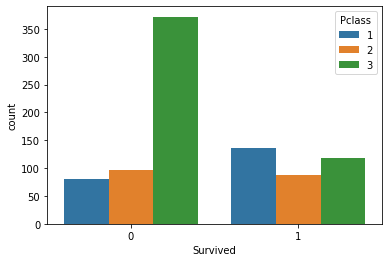

In [1131]:
# visualization of column Survived to check survived vs not survived ratio on pclass
sns.countplot(x = "Survived", hue="Pclass" , data = train_data)

**Visualizing frequency distribution of Age column**

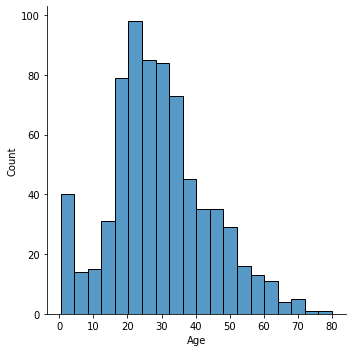

In [1132]:
# visualizing age frequency
sns.displot(train_data['Age'].dropna())

**Visualizing frequency distribution of SibSp column**

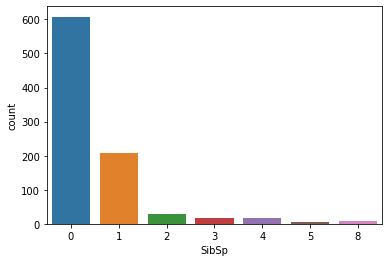

In [1133]:
#visualizing SibSp frequency
sns.countplot(x = 'SibSp', data = train_data)

**Visualizing frequency distribution of Fare column**

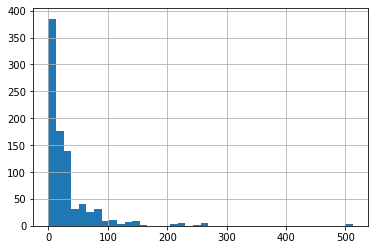

In [1134]:
# visualizing fare frequency
train_data['Fare'].hist(bins = 40)

**Box plot of Age vs Pclass columns**

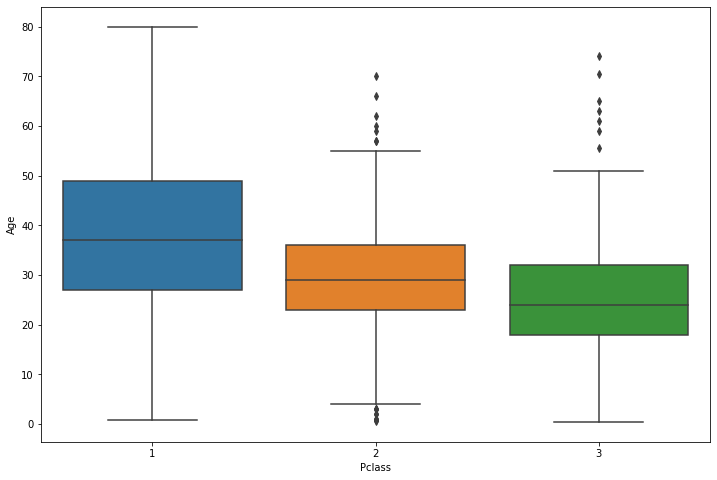

In [1135]:
# box plot of Age vs Pclass
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 8))
sns.boxplot(x = "Pclass", y = "Age", data = train_data)

**Description of Age Column**

In [1136]:
train_data["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

**Feature Engineering on null values of Age column**

In [1137]:
# Feature Engineering on Age of null data, based on pclass
# pclass 1 == 38.000000
# pclass 2 == 28.000000
# pclass 3 == 20.125000
def ageEngineering(cols):
  age = cols[0]
  pclass = cols[1]

  if pd.isnull(age):
    if pclass == 1:
      return 38.000000
    elif pclass == 2:
      return 28.000000
    else:
      return 20.125000
  else:
    return age

# feature engineering of Age based on Pclass
train_data['Age'] = train_data[['Age', "Pclass"]].apply(ageEngineering, axis = 1)
test_data['Age'] = test_data[['Age', "Pclass"]].apply(ageEngineering, axis = 1)

**Checking if there is any more null values in train data**

In [1138]:
# checking if there is any other null values
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

**Checking if there is any null values in test data**


In [1139]:
# checking if there is any null values in test data
test_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

**Box plot of Fare vs Pclass columns**

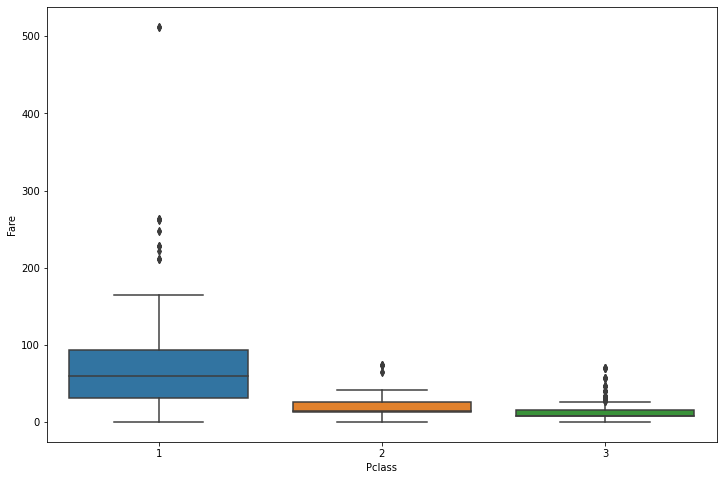

In [1140]:
# box plot of Fare vs Pclass
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 8))
sns.boxplot(x = "Pclass", y = "Fare", data = train_data)

**Description of Fare column**

In [1141]:
train_data["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

**Feature Engineering on null values of Fare column as there is null values in fare column in test data**

In [1142]:
# Feature Engineering on fare of null data, based on pclass
# pclass 1 == 31.000000
# pclass 2 == 14.454200
# pclass 3 == 7.910400
def fareEngineering(cols):
  fare = cols[0]
  pclass = cols[1]

  if pd.isnull(fare):
    if pclass == 1:
      return 31.000000
    elif pclass == 2:
      return 14.454200
    else:
      return 7.910400
  else:
    return fare

# feature engineering of Age based on Pclass
train_data['Fare'] = train_data[['Fare', "Pclass"]].apply(fareEngineering, axis = 1)
test_data['Fare'] = test_data[['Fare', "Pclass"]].apply(fareEngineering, axis = 1)

**Preprocessing Sex and Age column data to numeric data**

In [1143]:
# Preprocess Sex and Age column data to numeric data
le = preprocessing.LabelEncoder()
columns = ["Sex", "Embarked"]

for col in columns:
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.transform(test_data[col])
      
train_data.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


**Data Modeling**

---



1.   Choose column named Survived for prediction.
2.   Choose features (independent variables) which will be used to train and test data.
3.   Create dummies to fit the Logistic Regression model to train data with survived data.
4.   Checking model score using train data and prediction variable.



In [1144]:
# Prediction on Survived data
y = train_data["Survived"]

# features that will be used to train and test data
features = ["Pclass", "Sex", "Age" , "SibSp", "Parch", "Fare", "Embarked"]

# dummies of train data and test data with features
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# training model with X to y and predicting y with test data
model = LogisticRegression(random_state=0, max_iter=1000).fit(X, y)

# prediction score on train data
print(model.score(X, y))

0.8069584736251403


**Prediction on Test Data for Submission**

In [1145]:
# Prediction on Test Data

predictions = model.predict(X_test)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
